In [1]:
from sklearn.ensemble import RandomForestRegressor
from utils import load_data, split_data, cross_validate_model, get_optimal_params

# Load data and set up cross-validation
data = load_data()
X, y, kfold = split_data(data)

Loaded 553 rows from CSV
Data split into 10 folds


# Algorithm 1: Random Forest Regressor
---
In this notebook I will implement, tune and analyse Random Forest Regressor to predict the tensile strength of steel

Fold 1:
  Train - R²: 0.9840, MAE: 8.39
  Test  - R²: 0.9302, MAE: 23.03
Fold 2:
  Train - R²: 0.9848, MAE: 8.33
  Test  - R²: 0.8925, MAE: 21.88
Fold 3:
  Train - R²: 0.9857, MAE: 8.17
  Test  - R²: 0.8770, MAE: 20.31
Fold 4:
  Train - R²: 0.9844, MAE: 8.26
  Test  - R²: 0.9345, MAE: 18.94
Fold 5:
  Train - R²: 0.9866, MAE: 7.84
  Test  - R²: 0.8592, MAE: 24.64
Fold 6:
  Train - R²: 0.9863, MAE: 8.10
  Test  - R²: 0.9059, MAE: 19.11
Fold 7:
  Train - R²: 0.9852, MAE: 8.31
  Test  - R²: 0.8559, MAE: 24.48
Fold 8:
  Train - R²: 0.9866, MAE: 7.87
  Test  - R²: 0.8598, MAE: 21.33
Fold 9:
  Train - R²: 0.9860, MAE: 7.85
  Test  - R²: 0.9141, MAE: 23.39
Fold 10:
  Train - R²: 0.9858, MAE: 8.10
  Test  - R²: 0.9295, MAE: 18.40


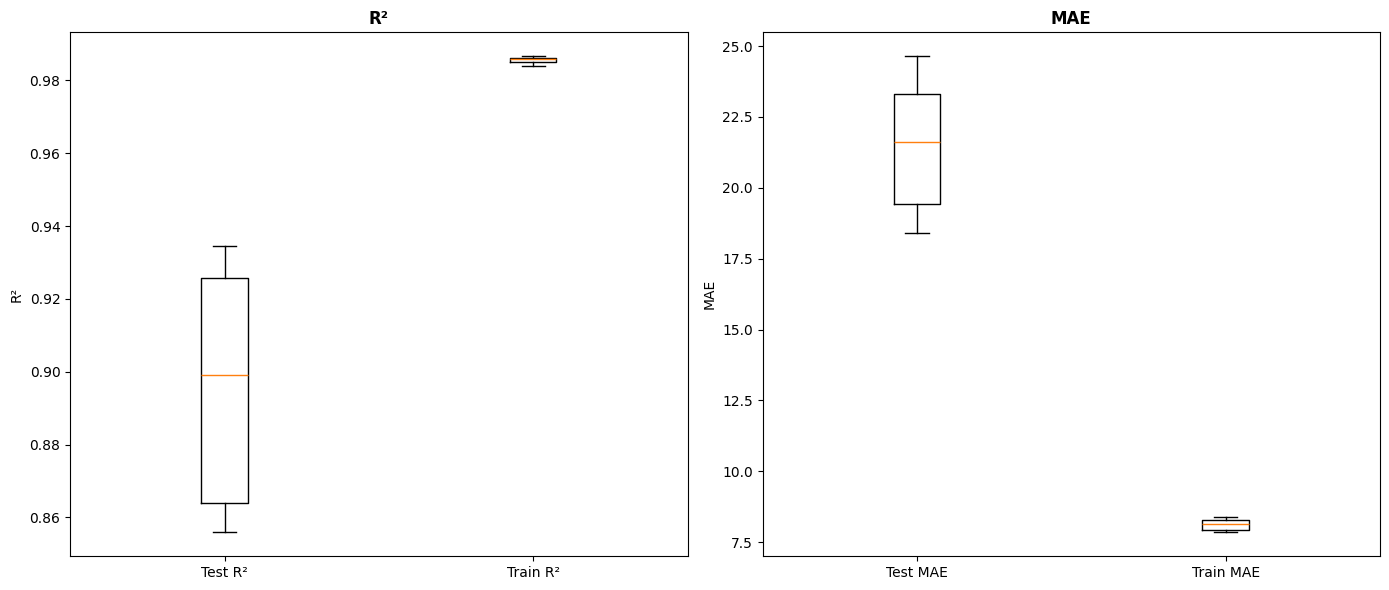

Mean Results Across Folds:
  Train R²:  0.9856
  Test R²:   0.8959
  Train MAE: 8.12
  Test MAE:  21.55


In [2]:
results = cross_validate_model(
    RandomForestRegressor,
    X, y, kfold,
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

Best params: {'max_depth': None, 'n_estimators': 300}
Fold 1:
  Train - R²: 0.9843, MAE: 8.23
  Test  - R²: 0.9345, MAE: 22.34
Fold 2:
  Train - R²: 0.9857, MAE: 8.14
  Test  - R²: 0.8971, MAE: 21.19
Fold 3:
  Train - R²: 0.9868, MAE: 7.96
  Test  - R²: 0.8790, MAE: 19.82
Fold 4:
  Train - R²: 0.9858, MAE: 7.99
  Test  - R²: 0.9397, MAE: 18.42
Fold 5:
  Train - R²: 0.9876, MAE: 7.57
  Test  - R²: 0.8630, MAE: 24.02
Fold 6:
  Train - R²: 0.9865, MAE: 7.95
  Test  - R²: 0.9045, MAE: 18.88
Fold 7:
  Train - R²: 0.9861, MAE: 8.01
  Test  - R²: 0.8590, MAE: 24.58
Fold 8:
  Train - R²: 0.9877, MAE: 7.69
  Test  - R²: 0.8523, MAE: 22.02
Fold 9:
  Train - R²: 0.9860, MAE: 7.90
  Test  - R²: 0.9116, MAE: 23.73
Fold 10:
  Train - R²: 0.9859, MAE: 8.00
  Test  - R²: 0.9296, MAE: 18.47


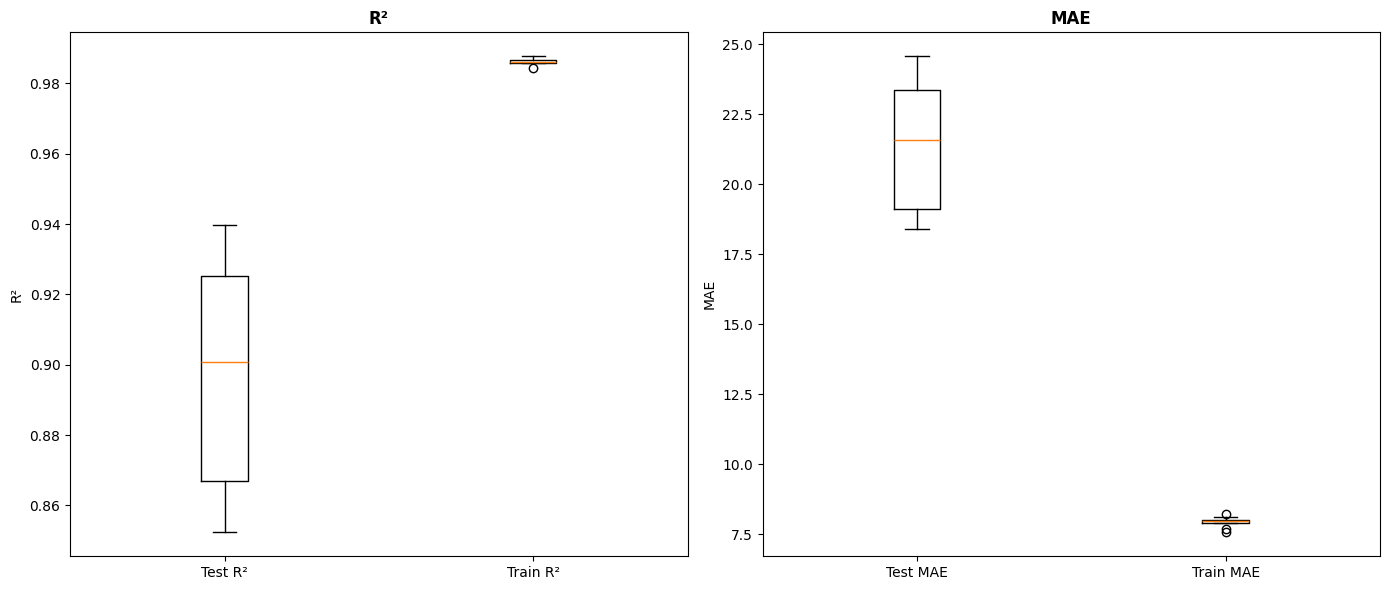

Mean Results Across Folds:
  Train R²:  0.9862
  Test R²:   0.8970
  Train MAE: 7.94
  Test MAE:  21.35


In [3]:
param_grid = {
  'n_estimators': [50, 100, 200, 300],
  'max_depth': [5, 10, 15, 20, None]
}

model = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

best_params = get_optimal_params(model, param_grid, X, y, kfold)

best_results = cross_validate_model(RandomForestRegressor, X, y, kfold,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42,
    n_jobs=-1
)

Best params: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Fold 1:
  Train - R²: 0.9032, MAE: 21.02
  Test  - R²: 0.8465, MAE: 35.23
Fold 2:
  Train - R²: 0.9107, MAE: 21.06
  Test  - R²: 0.8359, MAE: 26.86
Fold 3:
  Train - R²: 0.9146, MAE: 21.00
  Test  - R²: 0.8087, MAE: 26.88
Fold 4:
  Train - R²: 0.9104, MAE: 20.92
  Test  - R²: 0.8793, MAE: 25.57
Fold 5:
  Train - R²: 0.9156, MAE: 20.48
  Test  - R²: 0.8268, MAE: 28.66
Fold 6:
  Train - R²: 0.9137, MAE: 21.01
  Test  - R²: 0.8578, MAE: 21.87
Fold 7:
  Train - R²: 0.9130, MAE: 21.23
  Test  - R²: 0.7978, MAE: 29.86
Fold 8:
  Train - R²: 0.9152, MAE: 20.77
  Test  - R²: 0.8503, MAE: 25.15
Fold 9:
  Train - R²: 0.9110, MAE: 20.47
  Test  - R²: 0.8382, MAE: 33.43
Fold 10:
  Train - R²: 0.9111, MAE: 20.92
  Test  - R²: 0.8857, MAE: 24.36


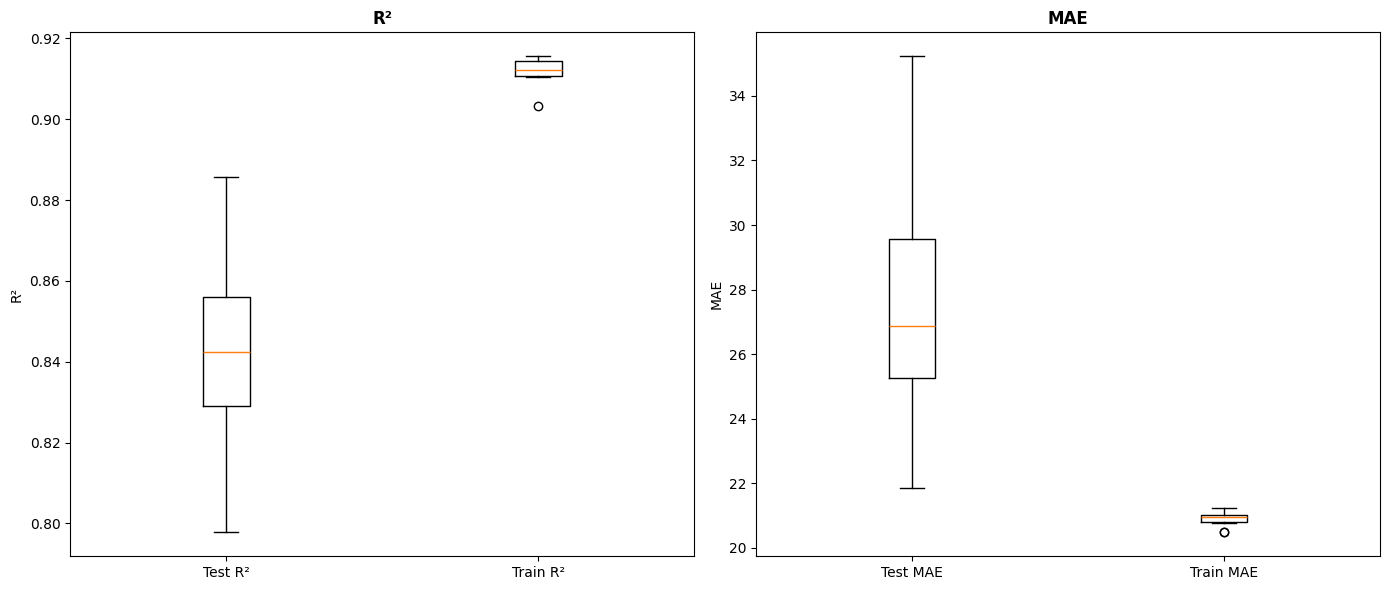

Mean Results Across Folds:
  Train R²:  0.9119
  Test R²:   0.8427
  Train MAE: 20.89
  Test MAE:  27.79


In [6]:
param_grid = {
  'n_estimators': [50, 100, 200, 300],
  'max_depth': [5, 10, 15, 20, None],
  'min_samples_split': [10, 20, 30],
  'min_samples_leaf': [5, 10, 15],
  'max_features': ['sqrt', 'log2', 1]
}

model = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

best_params = get_optimal_params(model, param_grid, X, y, kfold)

best_results = cross_validate_model(RandomForestRegressor, X, y, kfold,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42,
    n_jobs=-1
)